# Swish-based classifier with data augmentation and stochastic weght-averaging
- Swish activation, 4 layers, 100 neurons per layer
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Model uses a running average of previous weights and preiodically starts a new average alongside the nominal one and eventually compares it to the nominal to try and replace it.
- If the nominal average is replaced with the new one, then SGD continues for the old average.
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 50
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [5]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'train.hdf5', "r+"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 16.614s 


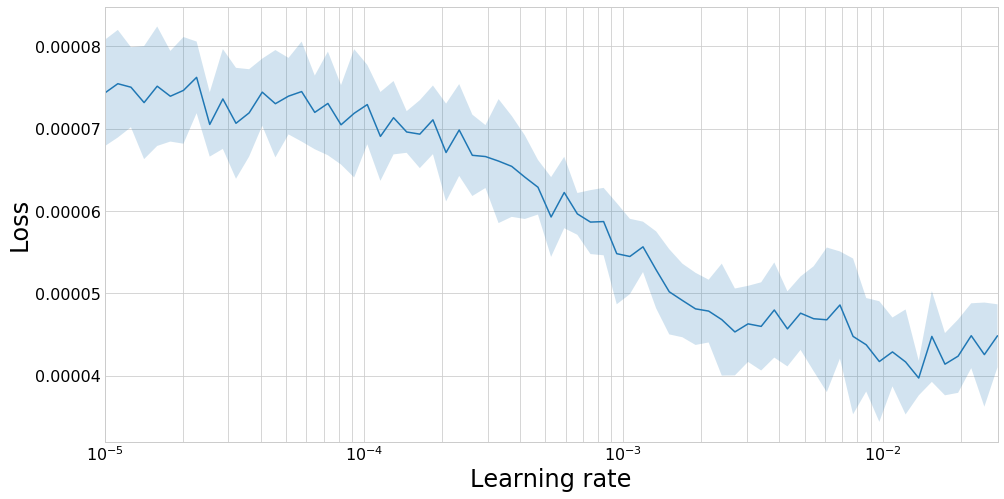

______________________________________



In [6]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.782730257858725e-05
2 New best found: 3.7083530180697376e-05
3 New best found: 3.5866813829472595e-05
4 New best found: 3.5496000211925435e-05
5 New best found: 3.5051803437193715e-05
7 New best found: 3.4738463111159635e-05
8 New best found: 3.462865444400493e-05
10 New best found: 3.4462820767997996e-05
11 New best found: 3.403319719399612e-05
14 New best found: 3.379549119391521e-05
19 New best found: 3.35609119150711e-05
22 New best found: 3.345716852587166e-05
25 New best found: 3.3345468563963644e-05
26 New best found: 3.30476613154614e-05
31 New best found: 3.299590676716505e-05
45 New best found: 3.276590595781574e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.275006803461652e-05, default loss 3.275006803461652e-05
50 New best found: 3.275006803461652e-05
model is 1 epochs old
51 swa loss 3.2647302272403994e-05, default loss 3.3307689666241716e-05
51 New best found: 3.

model is 48 epochs old
new model is 13 epochs old
98 swa loss 3.206968454260033e-05, default loss 3.2781790328818256e-05
98 New best found: 3.206968454260033e-05
model is 49 epochs old
new model is 14 epochs old
99 swa loss 3.20623564621279e-05, default loss 3.226779094519506e-05
99 New best found: 3.20623564621279e-05
model is 50 epochs old
new model is 15 epochs old
100 swa loss 3.2059116347894995e-05, default loss 3.2635459111098045e-05
100 New best found: 3.2059116347894995e-05
model is 51 epochs old
new model is 16 epochs old
101 swa loss 3.2054134873541163e-05, default loss 3.2959249654041886e-05
101 New best found: 3.2054134873541163e-05
model is 52 epochs old
new model is 17 epochs old
102 swa loss 3.204861356491499e-05, default loss 3.286398730101571e-05
102 New best found: 3.204861356491499e-05
model is 53 epochs old
new model is 18 epochs old
103 swa loss 3.204767774866647e-05, default loss 3.260210281478224e-05
103 New best found: 3.204767774866647e-05
model is 54 epochs ol

148 swa loss 3.1915188719614285e-05, default loss 3.233624982525028e-05
148 New best found: 3.1915188719614285e-05
model is 64 epochs old
new model is 13 epochs old
149 swa loss 3.1913633756014774e-05, default loss 3.2539459220950845e-05
149 New best found: 3.1913633756014774e-05
model is 65 epochs old
new model is 14 epochs old
150 swa loss 3.190853292095527e-05, default loss 3.2372270095105665e-05
150 New best found: 3.190853292095527e-05
model is 66 epochs old
new model is 15 epochs old
151 swa loss 3.190752476014711e-05, default loss 3.25671981823149e-05
151 New best found: 3.190752476014711e-05
model is 67 epochs old
new model is 16 epochs old
152 swa loss 3.190626375179227e-05, default loss 3.285106139248841e-05
152 New best found: 3.190626375179227e-05
model is 68 epochs old
new model is 17 epochs old
153 swa loss 3.190298822697134e-05, default loss 3.270791857220652e-05
153 New best found: 3.190298822697134e-05
model is 69 epochs old
new model is 18 epochs old
154 swa loss 3.18

206 swa loss 3.1871493529734346e-05, default loss 3.286405184593306e-05
model is 71 epochs old
new model is 20 epochs old
Checking renewal swa model, current model: 3.1871957053541533e-05, new model: 3.1981339287360716e-05
Current model better, renewing
____________________


207 swa loss 3.1871957053541533e-05, default loss 3.2422843384637887e-05
model is 72 epochs old
new model is 1 epochs old
208 swa loss 3.187301196394903e-05, default loss 3.249811795009784e-05
model is 73 epochs old
new model is 2 epochs old
209 swa loss 3.1873666900986804e-05, default loss 3.2631612995034174e-05
Early stopping after 209 epochs
Score is: {'loss': 3.1851666831240695e-05, 'wAUC': 0.06367964275374993, 'AUC': 0.09823310971703636, 'AMS': 4.087774054023765, 'cut': 0.920567512512207}
Fold took 260.383s

Running fold 2 / 10
1 New best found: 3.7382390996040194e-05
2 New best found: 3.6465070365801474e-05
3 New best found: 3.6223653549852605e-05
5 New best found: 3.5963341579077226e-05
6 New best found: 3.

90 swa loss 3.228207136835007e-05, default loss 3.2937417613247606e-05
90 New best found: 3.228207136835007e-05
model is 31 epochs old
new model is 5 epochs old
91 swa loss 3.2278439017251756e-05, default loss 3.283616465590281e-05
91 New best found: 3.2278439017251756e-05
model is 32 epochs old
new model is 6 epochs old
92 swa loss 3.227969824425267e-05, default loss 3.28950040145328e-05
model is 33 epochs old
new model is 7 epochs old
93 swa loss 3.2277364532462006e-05, default loss 3.281662891573309e-05
93 New best found: 3.2277364532462006e-05
model is 34 epochs old
new model is 8 epochs old
94 swa loss 3.22698823242647e-05, default loss 3.281767069883734e-05
94 New best found: 3.22698823242647e-05
model is 35 epochs old
new model is 9 epochs old
95 swa loss 3.2276028214112904e-05, default loss 3.350482371194197e-05
model is 36 epochs old
new model is 10 epochs old
96 swa loss 3.227471561589071e-05, default loss 3.27619982651394e-05
model is 37 epochs old
new model is 11 epochs old

141 swa loss 3.2173874429043603e-05, default loss 3.277740143311245e-05
141 New best found: 3.2173874429043603e-05
model is 82 epochs old
new model is 21 epochs old
142 swa loss 3.2172755863769805e-05, default loss 3.35300496694462e-05
142 New best found: 3.2172755863769805e-05
model is 83 epochs old
new model is 22 epochs old
143 swa loss 3.217062910609513e-05, default loss 3.271317328634053e-05
143 New best found: 3.217062910609513e-05
model is 84 epochs old
new model is 23 epochs old
144 swa loss 3.2166720175727135e-05, default loss 3.251905157190651e-05
144 New best found: 3.2166720175727135e-05
model is 85 epochs old
new model is 24 epochs old
145 swa loss 3.216288329433712e-05, default loss 3.290381417166805e-05
145 New best found: 3.216288329433712e-05
model is 86 epochs old
new model is 25 epochs old
Checking renewal swa model, current model: 3.215978190350372e-05, new model: 3.2108671436348725e-05
New model better, replacing
____________________


Old average better than curre

190 swa loss 3.203968657541043e-05, default loss 3.275038365099984e-05
190 New best found: 3.203968657541043e-05
model is 70 epochs old
new model is 14 epochs old
191 swa loss 3.2038224403665816e-05, default loss 3.260620928405749e-05
191 New best found: 3.2038224403665816e-05
model is 71 epochs old
new model is 15 epochs old
192 swa loss 3.203710157545675e-05, default loss 3.266078249580169e-05
192 New best found: 3.203710157545675e-05
model is 72 epochs old
new model is 16 epochs old
193 swa loss 3.203724822458549e-05, default loss 3.303981659948792e-05
model is 73 epochs old
new model is 17 epochs old
194 swa loss 3.203795282637542e-05, default loss 3.303424566098697e-05
model is 74 epochs old
new model is 18 epochs old
195 swa loss 3.203794956751758e-05, default loss 3.2673093116981245e-05
model is 75 epochs old
new model is 19 epochs old
196 swa loss 3.203813797568448e-05, default loss 3.2788791502971175e-05
model is 76 epochs old
new model is 20 epochs old
Checking renewal swa mo

5 New best found: 3.567823123335758e-05
7 New best found: 3.47538667382127e-05
8 New best found: 3.4628386908639426e-05
11 New best found: 3.404298745408155e-05
14 New best found: 3.398440146418646e-05
19 New best found: 3.3889157884810864e-05
21 New best found: 3.380177176365891e-05
22 New best found: 3.340397528732843e-05
33 New best found: 3.32613129599745e-05
34 New best found: 3.325217770723552e-05
38 New best found: 3.324672995314244e-05
42 New best found: 3.318729995660548e-05
45 New best found: 3.307465137998397e-05
47 New best found: 3.3060853217372465e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.357999394252024e-05, default loss 3.357999394252024e-05
model is 1 epochs old
51 swa loss 3.32529984191887e-05, default loss 3.3667279891621254e-05
model is 2 epochs old
52 swa loss 3.297007442823133e-05, default loss 3.3160729497826385e-05
52 New best found: 3.297007442823133e-05
model is 3 epochs old
53 swa loss 3.2848166153771685e-05, default loss 3.342441906220708e-05
53 

100 swa loss 3.232377883825853e-05, default loss 3.2741390851494965e-05
100 New best found: 3.232377883825853e-05
model is 41 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.2321982477264825e-05, new model: 3.236140991862741e-05
Current model better, renewing
____________________


101 swa loss 3.2321982477264825e-05, default loss 3.281146281504879e-05
101 New best found: 3.2321982477264825e-05
model is 42 epochs old
new model is 1 epochs old
102 swa loss 3.231977044713512e-05, default loss 3.316758045619386e-05
102 New best found: 3.231977044713512e-05
model is 43 epochs old
new model is 2 epochs old
103 swa loss 3.231825085135936e-05, default loss 3.286767881962577e-05
103 New best found: 3.231825085135936e-05
model is 44 epochs old
new model is 3 epochs old
104 swa loss 3.231509369019181e-05, default loss 3.3078592890944304e-05
104 New best found: 3.231509369019181e-05
model is 45 epochs old
new model is 4 epochs old
105 swa loss 3.2309892630683424

152 swa loss 3.21788129191317e-05, default loss 3.275177637914525e-05
152 New best found: 3.21788129191317e-05
model is 52 epochs old
new model is 1 epochs old
153 swa loss 3.217511218973458e-05, default loss 3.2650868731879985e-05
153 New best found: 3.217511218973458e-05
model is 53 epochs old
new model is 2 epochs old
154 swa loss 3.2175486756548563e-05, default loss 3.3074346331704975e-05
model is 54 epochs old
new model is 3 epochs old
155 swa loss 3.217429085641017e-05, default loss 3.264808210121027e-05
155 New best found: 3.217429085641017e-05
model is 55 epochs old
new model is 4 epochs old
156 swa loss 3.217047554588549e-05, default loss 3.269180817935188e-05
156 New best found: 3.217047554588549e-05
model is 56 epochs old
new model is 5 epochs old
157 swa loss 3.2169688120105205e-05, default loss 3.2898438942977874e-05
157 New best found: 3.2169688120105205e-05
model is 57 epochs old
new model is 6 epochs old
158 swa loss 3.217151379130045e-05, default loss 3.308901086488827

model is 52 epochs old
new model is 1 epochs old
204 swa loss 3.207339942728765e-05, default loss 3.256299289116923e-05
204 New best found: 3.207339942728765e-05
model is 53 epochs old
new model is 2 epochs old
205 swa loss 3.207121248563363e-05, default loss 3.2844741591109565e-05
205 New best found: 3.207121248563363e-05
model is 54 epochs old
new model is 3 epochs old
206 swa loss 3.207046269697203e-05, default loss 3.2924767097005544e-05
206 New best found: 3.207046269697203e-05
model is 55 epochs old
new model is 4 epochs old
207 swa loss 3.207117174291351e-05, default loss 3.2724566280045845e-05
model is 56 epochs old
new model is 5 epochs old
208 swa loss 3.207165404459799e-05, default loss 3.274120756729291e-05
model is 57 epochs old
new model is 6 epochs old
209 swa loss 3.207200897301825e-05, default loss 3.280795766077373e-05
model is 58 epochs old
new model is 7 epochs old
210 swa loss 3.207186870725681e-05, default loss 3.272853949962144e-05
model is 59 epochs old
new mode

model is 113 epochs old
new model is 17 epochs old
265 swa loss 3.205472515552248e-05, default loss 3.2775094868388384e-05
model is 114 epochs old
new model is 18 epochs old
266 swa loss 3.205650900967375e-05, default loss 3.3161196115719994e-05
model is 115 epochs old
new model is 19 epochs old
267 swa loss 3.20548001620521e-05, default loss 3.282608163390758e-05
model is 116 epochs old
new model is 20 epochs old
268 swa loss 3.205242816172984e-05, default loss 3.2496811878691516e-05
model is 117 epochs old
new model is 21 epochs old
269 swa loss 3.2052468050946075e-05, default loss 3.311020718407249e-05
model is 118 epochs old
new model is 22 epochs old
270 swa loss 3.205184342378806e-05, default loss 3.271467257449583e-05
model is 119 epochs old
new model is 23 epochs old
271 swa loss 3.205175128387158e-05, default loss 3.274121031148207e-05
model is 120 epochs old
new model is 24 epochs old
272 swa loss 3.2052149356807694e-05, default loss 3.281824671317585e-05
model is 121 epochs 

model is 32 epochs old
new model is 12 epochs old
82 swa loss 3.135300649737474e-05, default loss 3.1873804911447225e-05
82 New best found: 3.135300649737474e-05
model is 33 epochs old
new model is 13 epochs old
83 swa loss 3.135323322057957e-05, default loss 3.195939578436082e-05
model is 34 epochs old
new model is 14 epochs old
84 swa loss 3.134830892522587e-05, default loss 3.2047397769929374e-05
84 New best found: 3.134830892522587e-05
model is 35 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.13360803105752e-05, new model: 3.134379547991557e-05
Current model better, renewing
____________________


85 swa loss 3.13360803105752e-05, default loss 3.1931607159640405e-05
85 New best found: 3.13360803105752e-05
model is 36 epochs old
new model is 1 epochs old
86 swa loss 3.132443361973856e-05, default loss 3.218945571934455e-05
86 New best found: 3.132443361973856e-05
model is 37 epochs old
new model is 2 epochs old
87 swa loss 3.1324110669083896e-05,

model is 48 epochs old
new model is 12 epochs old
133 swa loss 3.117945761914598e-05, default loss 3.2056893831759224e-05
model is 49 epochs old
new model is 13 epochs old
134 swa loss 3.117402367352042e-05, default loss 3.175818151867133e-05
134 New best found: 3.117402367352042e-05
model is 50 epochs old
new model is 14 epochs old
135 swa loss 3.117166382289724e-05, default loss 3.1722047565563114e-05
135 New best found: 3.117166382289724e-05
model is 51 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.1169812567532065e-05, new model: 3.11243363757967e-05
New model better, replacing
____________________


Old average better than current point, starting SGD from old average
136 swa loss 3.11243363757967e-05, default loss 3.181371884857072e-05
136 New best found: 3.11243363757967e-05
model is 16 epochs old
new model is 0 epochs old
137 swa loss 3.112772654276341e-05, default loss 3.191968894680031e-05
model is 17 epochs old
new model is 1 epochs old
13

model is 67 epochs old
new model is 1 epochs old
188 swa loss 3.110010064119706e-05, default loss 3.17324228482903e-05
model is 68 epochs old
new model is 2 epochs old
189 swa loss 3.110122625075746e-05, default loss 3.182846481940942e-05
model is 69 epochs old
new model is 3 epochs old
190 swa loss 3.110354080417892e-05, default loss 3.213251423585461e-05
model is 70 epochs old
new model is 4 epochs old
191 swa loss 3.110517535242252e-05, default loss 3.191874063413706e-05
model is 71 epochs old
new model is 5 epochs old
192 swa loss 3.110651858150959e-05, default loss 3.1727553701784926e-05
model is 72 epochs old
new model is 6 epochs old
193 swa loss 3.110730413318379e-05, default loss 3.230012244603131e-05
model is 73 epochs old
new model is 7 epochs old
194 swa loss 3.110874983394751e-05, default loss 3.1854337518598184e-05
model is 74 epochs old
new model is 8 epochs old
195 swa loss 3.110871480894275e-05, default loss 3.1757166169700214e-05
model is 75 epochs old
new model is 9 

66 swa loss 3.2250765819480874e-05, default loss 3.265782208763994e-05
66 New best found: 3.2250765819480874e-05
model is 17 epochs old
new model is 7 epochs old
67 swa loss 3.223821607534774e-05, default loss 3.270418248866917e-05
67 New best found: 3.223821607534774e-05
model is 18 epochs old
new model is 8 epochs old
68 swa loss 3.2237474337307506e-05, default loss 3.3040945396351165e-05
68 New best found: 3.2237474337307506e-05
model is 19 epochs old
new model is 9 epochs old
69 swa loss 3.2233968462969645e-05, default loss 3.309633161406964e-05
69 New best found: 3.2233968462969645e-05
model is 20 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.2222013627324486e-05, new model: 3.2189638627460227e-05
New model better, replacing
____________________


Old average better than current point, starting SGD from old average
70 swa loss 3.2189638627460227e-05, default loss 3.259418510133401e-05
70 New best found: 3.2189638627460227e-05
model is 11 epochs

model is 30 epochs old
new model is 9 epochs old
116 swa loss 3.203493361506844e-05, default loss 3.2412529257999264e-05
116 New best found: 3.203493361506844e-05
model is 31 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.2033768232213334e-05, new model: 3.208982803116669e-05
Current model better, renewing
____________________


117 swa loss 3.2033768232213334e-05, default loss 3.2675480742182114e-05
117 New best found: 3.2033768232213334e-05
model is 32 epochs old
new model is 1 epochs old
118 swa loss 3.202685797223239e-05, default loss 3.2520309029496275e-05
118 New best found: 3.202685797223239e-05
model is 33 epochs old
new model is 2 epochs old
119 swa loss 3.2022035865520595e-05, default loss 3.295199669737485e-05
119 New best found: 3.2022035865520595e-05
model is 34 epochs old
new model is 3 epochs old
120 swa loss 3.202224671913427e-05, default loss 3.281190916604828e-05
model is 35 epochs old
new model is 4 epochs old
121 swa loss 3.202170

model is 85 epochs old
new model is 19 epochs old
171 swa loss 3.197074875351973e-05, default loss 3.246063376282109e-05
171 New best found: 3.197074875351973e-05
model is 86 epochs old
new model is 20 epochs old
172 swa loss 3.19679986248957e-05, default loss 3.313290917576523e-05
172 New best found: 3.19679986248957e-05
model is 87 epochs old
new model is 21 epochs old
173 swa loss 3.196713353972882e-05, default loss 3.298679867293686e-05
173 New best found: 3.196713353972882e-05
model is 88 epochs old
new model is 22 epochs old
174 swa loss 3.196645982534392e-05, default loss 3.272883416429977e-05
174 New best found: 3.196645982534392e-05
model is 89 epochs old
new model is 23 epochs old
175 swa loss 3.19653891499911e-05, default loss 3.2517031108727675e-05
175 New best found: 3.19653891499911e-05
model is 90 epochs old
new model is 24 epochs old
176 swa loss 3.1967107320087964e-05, default loss 3.2836022131232314e-05
model is 91 epochs old
new model is 25 epochs old
Checking renewa

225 swa loss 3.1967251781316005e-05, default loss 3.270104341499973e-05
model is 49 epochs old
new model is 3 epochs old
226 swa loss 3.1964619068457976e-05, default loss 3.285352371240151e-05
model is 50 epochs old
new model is 4 epochs old
227 swa loss 3.196127960836748e-05, default loss 3.2660870502877513e-05
model is 51 epochs old
new model is 5 epochs old
228 swa loss 3.195876862664591e-05, default loss 3.252269493823405e-05
model is 52 epochs old
new model is 6 epochs old
229 swa loss 3.195445579185616e-05, default loss 3.245353114325553e-05
model is 53 epochs old
new model is 7 epochs old
230 swa loss 3.195626434098813e-05, default loss 3.265415932692122e-05
model is 54 epochs old
new model is 8 epochs old
231 swa loss 3.1959387580718615e-05, default loss 3.2807267312455224e-05
model is 55 epochs old
new model is 9 epochs old
232 swa loss 3.196010577012203e-05, default loss 3.266721963082091e-05
model is 56 epochs old
new model is 10 epochs old
233 swa loss 3.1961822826997375e-0

model is 46 epochs old
new model is 10 epochs old
284 swa loss 3.1906563171651216e-05, default loss 3.247029241392738e-05
284 New best found: 3.1906563171651216e-05
model is 47 epochs old
new model is 11 epochs old
285 swa loss 3.190759524150053e-05, default loss 3.261167307136929e-05
model is 48 epochs old
new model is 12 epochs old
286 swa loss 3.19128403927607e-05, default loss 3.277041854380514e-05
model is 49 epochs old
new model is 13 epochs old
287 swa loss 3.191169958372484e-05, default loss 3.275079830127652e-05
model is 50 epochs old
new model is 14 epochs old
288 swa loss 3.1911758469505e-05, default loss 3.251385248877341e-05
model is 51 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.191065532519133e-05, new model: 3.1979004405002343e-05
Current model better, renewing
____________________


289 swa loss 3.191065532519133e-05, default loss 3.25381731527159e-05
model is 52 epochs old
new model is 1 epochs old
290 swa loss 3.19071804129635e-

11 New best found: 3.473808740673121e-05
12 New best found: 3.4567826022976076e-05
20 New best found: 3.399030490982113e-05
23 New best found: 3.392013009870425e-05
32 New best found: 3.366684100765269e-05
39 New best found: 3.358133774017915e-05
41 New best found: 3.355355699895881e-05
43 New best found: 3.3418574136157986e-05
49 New best found: 3.340702684217831e-05
SWA beginning
model is 0 epochs old
50 swa loss 3.378049138700589e-05, default loss 3.378049138700589e-05
model is 1 epochs old
51 swa loss 3.328703830484301e-05, default loss 3.340770116774365e-05
51 New best found: 3.328703830484301e-05
model is 2 epochs old
52 swa loss 3.30975381861208e-05, default loss 3.326577802363318e-05
52 New best found: 3.30975381861208e-05
model is 3 epochs old
53 swa loss 3.3001338367466815e-05, default loss 3.322223069844767e-05
53 New best found: 3.3001338367466815e-05
model is 4 epochs old
54 swa loss 3.295316900621401e-05, default loss 3.3316623014979996e-05
54 New best found: 3.2953169006

99 swa loss 3.266402660519816e-05, default loss 3.325646441662684e-05
99 New best found: 3.266402660519816e-05
model is 40 epochs old
new model is 14 epochs old
100 swa loss 3.266448351787403e-05, default loss 3.338236108247656e-05
model is 41 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.2659173411957456e-05, new model: 3.262009180471068e-05
New model better, replacing
____________________


Old average better than current point, starting SGD from old average
101 swa loss 3.262009180471068e-05, default loss 3.338496099750046e-05
101 New best found: 3.262009180471068e-05
model is 16 epochs old
new model is 0 epochs old
102 swa loss 3.2626677997177466e-05, default loss 3.346099126647459e-05
model is 17 epochs old
new model is 1 epochs old
103 swa loss 3.2623476049047895e-05, default loss 3.369576736877207e-05
model is 18 epochs old
new model is 2 epochs old
104 swa loss 3.2624718015722465e-05, default loss 3.370194094022736e-05
model is 19 epochs old

150 swa loss 3.252297296421602e-05, default loss 3.3173897324013524e-05
150 New best found: 3.252297296421602e-05
model is 65 epochs old
new model is 19 epochs old
151 swa loss 3.251846270286478e-05, default loss 3.295291503891349e-05
151 New best found: 3.251846270286478e-05
model is 66 epochs old
new model is 20 epochs old
Checking renewal swa model, current model: 3.2515165976656135e-05, new model: 3.250496874825331e-05
New model better, replacing
____________________


Old average better than current point, starting SGD from old average
152 swa loss 3.250496874825331e-05, default loss 3.286970960907638e-05
152 New best found: 3.250496874825331e-05
model is 21 epochs old
new model is 0 epochs old
153 swa loss 3.249406871327665e-05, default loss 3.311546821860247e-05
153 New best found: 3.249406871327665e-05
model is 22 epochs old
new model is 1 epochs old
154 swa loss 3.2493351551238446e-05, default loss 3.3248805449693464e-05
154 New best found: 3.2493351551238446e-05
model is 23 e

model is 72 epochs old
new model is 1 epochs old
204 swa loss 3.246456438209862e-05, default loss 3.296658255567308e-05
204 New best found: 3.246456438209862e-05
model is 73 epochs old
new model is 2 epochs old
205 swa loss 3.24598814258934e-05, default loss 3.292853332532104e-05
205 New best found: 3.24598814258934e-05
model is 74 epochs old
new model is 3 epochs old
206 swa loss 3.245712585921865e-05, default loss 3.333845257438952e-05
206 New best found: 3.245712585921865e-05
model is 75 epochs old
new model is 4 epochs old
207 swa loss 3.24558828084264e-05, default loss 3.32357211256749e-05
207 New best found: 3.24558828084264e-05
model is 76 epochs old
new model is 5 epochs old
208 swa loss 3.245625557028689e-05, default loss 3.306144656380639e-05
model is 77 epochs old
new model is 6 epochs old
209 swa loss 3.24549929558998e-05, default loss 3.311924810695927e-05
209 New best found: 3.24549929558998e-05
model is 78 epochs old
new model is 7 epochs old
210 swa loss 3.2453611734672

Old average better than current point, starting SGD from old average
258 swa loss 3.24124760212726e-05, default loss 3.330169878463494e-05
258 New best found: 3.24124760212726e-05
model is 31 epochs old
new model is 0 epochs old
259 swa loss 3.240959377289983e-05, default loss 3.2826597907114777e-05
259 New best found: 3.240959377289983e-05
model is 32 epochs old
new model is 1 epochs old
260 swa loss 3.240597342519323e-05, default loss 3.311342376400717e-05
260 New best found: 3.240597342519323e-05
model is 33 epochs old
new model is 2 epochs old
261 swa loss 3.2405512122204526e-05, default loss 3.305444090947276e-05
261 New best found: 3.2405512122204526e-05
model is 34 epochs old
new model is 3 epochs old
262 swa loss 3.2402190218272156e-05, default loss 3.304790636320831e-05
262 New best found: 3.2402190218272156e-05
model is 35 epochs old
new model is 4 epochs old
263 swa loss 3.239777962153312e-05, default loss 3.302507712505758e-05
263 New best found: 3.239777962153312e-05
model

model is 89 epochs old
new model is 8 epochs old
317 swa loss 3.242389846855076e-05, default loss 3.308227555389749e-05
model is 90 epochs old
new model is 9 epochs old
318 swa loss 3.2425022232928317e-05, default loss 3.33519763807999e-05
model is 91 epochs old
new model is 10 epochs old
319 swa loss 3.2426537141145674e-05, default loss 3.332644044712652e-05
Early stopping after 319 epochs
Score is: {'loss': 3.238628288381733e-05, 'wAUC': 0.06601185775792917, 'AUC': 0.10150673707534064, 'AMS': 3.8542441701224988, 'cut': 0.9861699342727661}
Fold took 480.264s

Running fold 7 / 10
1 New best found: 3.713394795195199e-05
2 New best found: 3.5300282650860024e-05
4 New best found: 3.4437779887230136e-05
5 New best found: 3.39702059616684e-05
7 New best found: 3.3538213693827854e-05
9 New best found: 3.329039853852009e-05
11 New best found: 3.302139234292554e-05
12 New best found: 3.3011299240752125e-05
16 New best found: 3.2492654201632834e-05
17 New best found: 3.24803749928833e-05
19 New

92 swa loss 3.074828954268014e-05, default loss 3.142919629026437e-05
92 New best found: 3.074828954268014e-05
model is 23 epochs old
new model is 2 epochs old
93 swa loss 3.0745918411412274e-05, default loss 3.136678485898301e-05
93 New best found: 3.0745918411412274e-05
model is 24 epochs old
new model is 3 epochs old
94 swa loss 3.073721670662053e-05, default loss 3.124994742902345e-05
94 New best found: 3.073721670662053e-05
model is 25 epochs old
new model is 4 epochs old
95 swa loss 3.0736483029613735e-05, default loss 3.148416581680067e-05
95 New best found: 3.0736483029613735e-05
model is 26 epochs old
new model is 5 epochs old
96 swa loss 3.073384146409808e-05, default loss 3.120757933356799e-05
96 New best found: 3.073384146409808e-05
model is 27 epochs old
new model is 6 epochs old
97 swa loss 3.073485485074343e-05, default loss 3.135681034036679e-05
model is 28 epochs old
new model is 7 epochs old
98 swa loss 3.0736762123706285e-05, default loss 3.146794975182274e-05
model 

147 swa loss 3.069717755133752e-05, default loss 3.1437609961722045e-05
147 New best found: 3.069717755133752e-05
model is 78 epochs old
new model is 12 epochs old
148 swa loss 3.069597926660208e-05, default loss 3.1128536551841535e-05
148 New best found: 3.069597926660208e-05
model is 79 epochs old
new model is 13 epochs old
149 swa loss 3.069445463552256e-05, default loss 3.1250738129892854e-05
149 New best found: 3.069445463552256e-05
model is 80 epochs old
new model is 14 epochs old
150 swa loss 3.0693540542415576e-05, default loss 3.141245304286713e-05
150 New best found: 3.0693540542415576e-05
model is 81 epochs old
new model is 15 epochs old
151 swa loss 3.0692424764856694e-05, default loss 3.109833998314571e-05
151 New best found: 3.0692424764856694e-05
model is 82 epochs old
new model is 16 epochs old
152 swa loss 3.0689598397293594e-05, default loss 3.1167994286806786e-05
152 New best found: 3.0689598397293594e-05
model is 83 epochs old
new model is 17 epochs old
153 swa loss

model is 68 epochs old
new model is 12 epochs old
204 swa loss 3.068488566495944e-05, default loss 3.1520772087969814e-05
model is 69 epochs old
new model is 13 epochs old
205 swa loss 3.0686191386485006e-05, default loss 3.1600964075187224e-05
model is 70 epochs old
new model is 14 epochs old
206 swa loss 3.0685210252704565e-05, default loss 3.133608702919446e-05
model is 71 epochs old
new model is 15 epochs old
207 swa loss 3.068192759674275e-05, default loss 3.1036388339998666e-05
model is 72 epochs old
new model is 16 epochs old
208 swa loss 3.068068446300458e-05, default loss 3.1158579359180296e-05
model is 73 epochs old
new model is 17 epochs old
209 swa loss 3.0678565394191535e-05, default loss 3.1342247818247415e-05
model is 74 epochs old
new model is 18 epochs old
210 swa loss 3.0679512488131877e-05, default loss 3.15789969987236e-05
model is 75 epochs old
new model is 19 epochs old
211 swa loss 3.068043634702917e-05, default loss 3.144623547414085e-05
model is 76 epochs old
n

84 swa loss 3.2329704278471433e-05, default loss 3.2968520306004716e-05
84 New best found: 3.2329704278471433e-05
model is 35 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.2327653334675244e-05, new model: 3.2346115858240385e-05
Current model better, renewing
____________________


85 swa loss 3.2327653334675244e-05, default loss 3.2858309412370904e-05
85 New best found: 3.2327653334675244e-05
model is 36 epochs old
new model is 1 epochs old
86 swa loss 3.232268587275749e-05, default loss 3.2719674358550686e-05
86 New best found: 3.232268587275749e-05
model is 37 epochs old
new model is 2 epochs old
87 swa loss 3.2316921578242233e-05, default loss 3.264185113379762e-05
87 New best found: 3.2316921578242233e-05
model is 38 epochs old
new model is 3 epochs old
88 swa loss 3.231355667363902e-05, default loss 3.2902745285947626e-05
88 New best found: 3.231355667363902e-05
model is 39 epochs old
new model is 4 epochs old
89 swa loss 3.2317559738144766e-05

134 swa loss 3.220215251254226e-05, default loss 3.272773406561809e-05
134 New best found: 3.220215251254226e-05
model is 50 epochs old
new model is 14 epochs old
135 swa loss 3.2201967794163784e-05, default loss 3.276455916856252e-05
135 New best found: 3.2201967794163784e-05
model is 51 epochs old
new model is 15 epochs old
Checking renewal swa model, current model: 3.220125330096532e-05, new model: 3.2255385175360914e-05
Current model better, renewing
____________________


136 swa loss 3.220125330096532e-05, default loss 3.2700272722654066e-05
136 New best found: 3.220125330096532e-05
model is 52 epochs old
new model is 1 epochs old
137 swa loss 3.220621490476217e-05, default loss 3.3319694554329385e-05
model is 53 epochs old
new model is 2 epochs old
138 swa loss 3.220540187002522e-05, default loss 3.322894575531958e-05
model is 54 epochs old
new model is 3 epochs old
139 swa loss 3.2204205560832515e-05, default loss 3.275179162341012e-05
model is 55 epochs old
new model is 4 epoc

model is 108 epochs old
new model is 12 epochs old
193 swa loss 3.219143857350111e-05, default loss 3.276032175798276e-05
model is 109 epochs old
new model is 13 epochs old
194 swa loss 3.2190549486607096e-05, default loss 3.2882071256412556e-05
194 New best found: 3.2190549486607096e-05
model is 110 epochs old
new model is 14 epochs old
195 swa loss 3.218952834157354e-05, default loss 3.28750453383515e-05
195 New best found: 3.218952834157354e-05
model is 111 epochs old
new model is 15 epochs old
196 swa loss 3.218743529634488e-05, default loss 3.246144683881783e-05
196 New best found: 3.218743529634488e-05
model is 112 epochs old
new model is 16 epochs old
197 swa loss 3.218589917393693e-05, default loss 3.2557490255708554e-05
197 New best found: 3.218589917393693e-05
model is 113 epochs old
new model is 17 epochs old
198 swa loss 3.218548652679064e-05, default loss 3.268230321729834e-05
198 New best found: 3.218548652679064e-05
model is 114 epochs old
new model is 18 epochs old
199 

model is 169 epochs old
new model is 8 epochs old
254 swa loss 3.2211558527394555e-05, default loss 3.304853063567474e-05
model is 170 epochs old
new model is 9 epochs old
255 swa loss 3.221153198460186e-05, default loss 3.342251764673993e-05
model is 171 epochs old
new model is 10 epochs old
256 swa loss 3.221190363135954e-05, default loss 3.2926740124804925e-05
model is 172 epochs old
new model is 11 epochs old
257 swa loss 3.2212747234059245e-05, default loss 3.308856439263291e-05
model is 173 epochs old
new model is 12 epochs old
258 swa loss 3.2213339124015705e-05, default loss 3.346151342812378e-05
model is 174 epochs old
new model is 13 epochs old
259 swa loss 3.2213954082094e-05, default loss 3.318800684703233e-05
model is 175 epochs old
new model is 14 epochs old
260 swa loss 3.221500805406978e-05, default loss 3.3126144159572816e-05
model is 176 epochs old
new model is 15 epochs old
261 swa loss 3.221559365796669e-05, default loss 3.309278854475453e-05
model is 177 epochs old

model is 39 epochs old
new model is 4 epochs old
89 swa loss 3.278510356606551e-05, default loss 3.331198416917406e-05
89 New best found: 3.278510356606551e-05
model is 40 epochs old
new model is 5 epochs old
90 swa loss 3.278649189528882e-05, default loss 3.367263107254085e-05
model is 41 epochs old
new model is 6 epochs old
91 swa loss 3.27869764830158e-05, default loss 3.360607487348204e-05
model is 42 epochs old
new model is 7 epochs old
92 swa loss 3.27896541753051e-05, default loss 3.380380983899072e-05
model is 43 epochs old
new model is 8 epochs old
93 swa loss 3.278920856883301e-05, default loss 3.330538497421215e-05
model is 44 epochs old
new model is 9 epochs old
94 swa loss 3.278764493046985e-05, default loss 3.3442168076028683e-05
model is 45 epochs old
new model is 10 epochs old
95 swa loss 3.2784820141339875e-05, default loss 3.338519774193232e-05
95 New best found: 3.2784820141339875e-05
model is 46 epochs old
new model is 11 epochs old
96 swa loss 3.278226887840977e-05

model is 58 epochs old
new model is 7 epochs old
143 swa loss 3.2681268626350406e-05, default loss 3.3160004837140855e-05
143 New best found: 3.2681268626350406e-05
model is 59 epochs old
new model is 8 epochs old
144 swa loss 3.26832762694854e-05, default loss 3.3463807383729e-05
model is 60 epochs old
new model is 9 epochs old
145 swa loss 3.268343153690741e-05, default loss 3.342386135646878e-05
model is 61 epochs old
new model is 10 epochs old
146 swa loss 3.268588310932241e-05, default loss 3.3423129577913986e-05
model is 62 epochs old
new model is 11 epochs old
147 swa loss 3.2688174382557205e-05, default loss 3.37412976325633e-05
model is 63 epochs old
new model is 12 epochs old
148 swa loss 3.2687021611688554e-05, default loss 3.332643509470012e-05
model is 64 epochs old
new model is 13 epochs old
149 swa loss 3.268605405394276e-05, default loss 3.363858837069782e-05
model is 65 epochs old
new model is 14 epochs old
150 swa loss 3.2682336576230614e-05, default loss 3.3306559742

205 swa loss 3.269943829712381e-05, default loss 3.350462898257095e-05
model is 121 epochs old
new model is 25 epochs old
206 swa loss 3.270032596813662e-05, default loss 3.362970951478247e-05
model is 122 epochs old
new model is 26 epochs old
207 swa loss 3.270266976658912e-05, default loss 3.3970970573007064e-05
model is 123 epochs old
new model is 27 epochs old
208 swa loss 3.2704108086687364e-05, default loss 3.3670331126112804e-05
model is 124 epochs old
new model is 28 epochs old
209 swa loss 3.270508323818411e-05, default loss 3.356502205861216e-05
model is 125 epochs old
new model is 29 epochs old
210 swa loss 3.2705745002700745e-05, default loss 3.3420825242045044e-05
model is 126 epochs old
new model is 30 epochs old
Checking renewal swa model, current model: 3.270622492630569e-05, new model: 3.292229474781781e-05
Current model better, renewing
____________________


211 swa loss 3.270622492630569e-05, default loss 3.327081960474156e-05
model is 127 epochs old
new model is 1 

75 swa loss 3.0940098442533874e-05, default loss 3.143017115074341e-05
75 New best found: 3.0940098442533874e-05
model is 26 epochs old
new model is 6 epochs old
76 swa loss 3.0939952395575426e-05, default loss 3.176933745062041e-05
76 New best found: 3.0939952395575426e-05
model is 27 epochs old
new model is 7 epochs old
77 swa loss 3.093785042575662e-05, default loss 3.1477911752699134e-05
77 New best found: 3.093785042575662e-05
model is 28 epochs old
new model is 8 epochs old
78 swa loss 3.094149545559204e-05, default loss 3.186895999861388e-05
model is 29 epochs old
new model is 9 epochs old
79 swa loss 3.092912551151753e-05, default loss 3.133023173641482e-05
79 New best found: 3.092912551151753e-05
model is 30 epochs old
new model is 10 epochs old
80 swa loss 3.0920961913451075e-05, default loss 3.1355518920993226e-05
80 New best found: 3.0920961913451075e-05
model is 31 epochs old
new model is 11 epochs old
81 swa loss 3.091661259245652e-05, default loss 3.153310306804466e-05
8

model is 26 epochs old
new model is 5 epochs old
127 swa loss 3.080987256512961e-05, default loss 3.14216718261167e-05
model is 27 epochs old
new model is 6 epochs old
128 swa loss 3.081227305640385e-05, default loss 3.14042799139737e-05
model is 28 epochs old
new model is 7 epochs old
129 swa loss 3.08119628786453e-05, default loss 3.171743789433859e-05
model is 29 epochs old
new model is 8 epochs old
130 swa loss 3.081470616870042e-05, default loss 3.177836289676255e-05
model is 30 epochs old
new model is 9 epochs old
131 swa loss 3.081915971490456e-05, default loss 3.15892095068723e-05
model is 31 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.0815757177940026e-05, new model: 3.091434051743199e-05
Current model better, renewing
____________________


132 swa loss 3.0815757177940026e-05, default loss 3.1293317485799315e-05
model is 32 epochs old
new model is 1 epochs old
133 swa loss 3.0805831796636256e-05, default loss 3.1034565149149986e-05
133 N

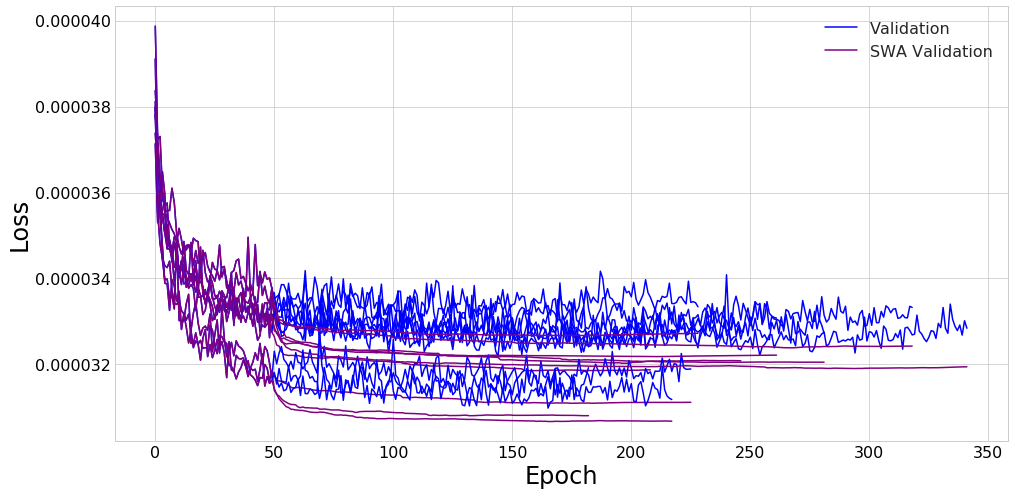

Mean loss = 3.18e-05 +- 2e-07
Mean wAUC = 0.0633 +- 0.0008
Mean AUC = 0.0989 +- 0.0009
Mean AMS = 3.99 +- 0.07
Mean cut = 0.961 +- 0.008
______________________________________



<Figure size 432x288 with 0 Axes>

In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          swaStart=50, swaRenewal=5, sgdReplacement=1,
                                          patience=patience, verbose=1, amsSize=250000)

## Construct ensemble

In [8]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [9]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 6 with loss = 3.067091407283442e-05
Model 1 is 9 with loss = 3.0805831796636256e-05
Model 2 is 3 with loss = 3.1095307201030666e-05
Model 3 is 0 with loss = 3.1851666831240695e-05
Model 4 is 4 with loss = 3.190413871343481e-05
Model 5 is 1 with loss = 3.202696956319927e-05
Model 6 is 2 with loss = 3.2046855833954254e-05
Model 7 is 7 with loss = 3.218206562589155e-05
Model 8 is 5 with loss = 3.238628288381733e-05
Model 9 is 8 with loss = 3.267134478553484e-05


## Response on validation data with TTA

In [10]:
valData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'val.hdf5', "r+"), inputPipe=inputPipe,
                                  rotate = True, reflect = True, augRotMult=8)

In [11]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.014636368491314352s per sample

Predicting batch 2 out of 10
Prediction took 0.013174735881388188s per sample

Predicting batch 3 out of 10
Prediction took 0.013260351202078163s per sample

Predicting batch 4 out of 10
Prediction took 0.01318099278435111s per sample

Predicting batch 5 out of 10
Prediction took 0.01326561675928533s per sample

Predicting batch 6 out of 10
Prediction took 0.013149711134843528s per sample

Predicting batch 7 out of 10
Prediction took 0.013116549149714411s per sample

Predicting batch 8 out of 10
Prediction took 0.013170874470844866s per sample

Predicting batch 9 out of 10
Prediction took 0.013097737515904009s per sample

Predicting batch 10 out of 10
Prediction took 0.013174677753821015s per sample



In [12]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.9028845011158693, weighted 0.9358998059151397


In [13]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.96739412338976, 0.961034)

In [14]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.961+-0.009
Exact mean cut 0.9605119107291102, corresponds to AMS of 3.9480397653835646
CPU times: user 2.06 s, sys: 10 s, total: 12.1 s
Wall time: 1min 54s


(4.0, 0.961)

# Test scoring

In [15]:
testData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'testing.hdf5', "r+"), inputPipe=inputPipe,
                                   rotate = True, reflect = True, augRotMult=8)

In [16]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.012879252519577064s per sample

Predicting batch 2 out of 10
Prediction took 0.012839435893432661s per sample

Predicting batch 3 out of 10
Prediction took 0.012834908445145597s per sample

Predicting batch 4 out of 10
Prediction took 0.012830830736542967s per sample

Predicting batch 5 out of 10
Prediction took 0.012821838734959337s per sample

Predicting batch 6 out of 10
Prediction took 0.012841498617590829s per sample

Predicting batch 7 out of 10
Prediction took 0.012970437158508734s per sample

Predicting batch 8 out of 10
Prediction took 0.012967447517456656s per sample

Predicting batch 9 out of 10
Prediction took 0.012924463899856941s per sample

Predicting batch 10 out of 10
Prediction took 0.01294110776599158s per sample

CPU times: user 2h 6min 3s, sys: 5min 6s, total: 2h 11min 9s
Wall time: 1h 58min 6s


In [32]:
scoreTestOD(testData.source, 0.9605119107291102)

Public:Private AMS: 3.6779096966947407 : 3.763932846292706


(3.6779096966947407, 3.763932846292706)

# Save/Load

In [33]:
name = "weights/Swish_SWA_Replacement"

In [34]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

In [ ]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)